In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# machine learning libs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline 
#from sklearn.compose import ColumnTransformer, make_column_selector
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn import config_context
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
artifacts = pd.read_csv('/data/p_dsi/teams2023/team2/ancient_artifacts_data/lithic_all_soil_joined_final.csv')
#artifacts = pd.read_csv('/Users/xueyuanli/Desktop/lithic_soil_joined.csv')
artifacts=artifacts.iloc[:,3:]
display(artifacts.tail(5))
artifacts.info()

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,...,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,lithic
409902,0.179,0.193,0.176,0.250,0.139,0.232,0.133,0.169,0.003,0.025,...,0.703,1.269,0.788,0.104,0.157,68.000,1.747,0.000,0.000,0
409903,0.260,0.285,0.263,0.708,0.145,0.784,0.144,0.256,0.014,0.053,...,0.372,1.809,0.553,0.231,0.204,52.857,5.428,0.789,0.161,0
409904,0.138,0.141,0.133,0.144,0.133,0.142,0.134,0.134,0.001,0.015,...,0.926,1.000,1.000,0.060,0.133,56.667,1.053,0.000,0.000,0
409905,0.241,0.252,0.239,0.302,0.160,0.304,0.158,0.247,0.006,0.046,...,0.790,1.489,0.672,0.184,0.200,56.667,1.921,0.000,0.000,0
409906,0.213,0.217,0.217,0.271,0.136,0.259,0.135,0.221,0.004,0.036,...,0.800,1.599,0.625,0.143,0.176,63.750,1.917,0.000,0.000,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409907 entries, 0 to 409906
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Da                  409907 non-null  float64
 1   Dp                  409907 non-null  float64
 2   FWidth              409907 non-null  float64
 3   FLength             409907 non-null  float64
 4   FThickness          409907 non-null  float64
 5   ELength             409907 non-null  float64
 6   EThickness          409907 non-null  float64
 7   EWidth              409907 non-null  float64
 8   Volume              409907 non-null  float64
 9   Area                409907 non-null  float64
 10  Perimeter           409907 non-null  float64
 11  CHull  Area         409907 non-null  float64
 12  CHull Perimeter     409907 non-null  float64
 13  Sphericity          409907 non-null  float64
 14  L/T Ratio           409907 non-null  float64
 15  T/L Aspect Ratio    409907 non-nul

In [4]:
# Let's make a dataframe that has an equal # of lithic rows and soil rows 

import random
soil_df = artifacts.loc[artifacts.loc[:, 'lithic'] == 0]
soil_sample_ids = []
soil_df = soil_df.reset_index(drop = True)
soil_all_ids = list(soil_df.index.values)

for i in range (0, 4867):
    random_id = random.choice(soil_all_ids)
    soil_sample_ids.append(random_id)
    soil_all_ids.remove(random_id)

small_soil_df = pd.DataFrame(columns = soil_df.columns)
for i in range (0, 4867):
    soil_sample_row = soil_df.loc[soil_sample_ids[i]]
    small_soil_df.loc[len(small_soil_df)] = soil_sample_row
    
small_soil_df.head()

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,...,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,lithic
0,0.246,0.263,0.265,0.359,0.173,0.334,0.166,0.263,0.009,0.047,...,0.738,1.532,0.653,0.195,0.219,57.143,2.014,0.233,0.182,0.0
1,0.246,0.261,0.271,0.440,0.137,0.429,0.127,0.268,0.009,0.048,...,0.616,1.984,0.504,0.196,0.204,60.000,3.390,0.212,0.118,0.0
2,0.266,0.314,0.285,0.549,0.140,0.580,0.132,0.253,0.011,0.056,...,0.519,2.026,0.494,0.250,0.212,68.000,4.379,0.627,0.139,0.0
3,0.252,0.309,0.281,0.585,0.187,0.588,0.190,0.264,0.016,0.050,...,0.480,1.504,0.665,0.233,0.234,60.000,3.094,0.724,0.101,0.0
4,0.228,0.243,0.204,0.319,0.181,0.323,0.183,0.209,0.006,0.041,...,0.639,1.125,0.889,0.168,0.193,55.000,1.761,0.000,0.000,0.0


In [5]:
lithic_df = artifacts.loc[artifacts.loc[:, 'lithic'] == 1] 

equal_sample_df = pd.concat([small_soil_df, lithic_df])
equal_sample_df.sample(10)

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,...,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,lithic
2014,0.254,0.297,0.283,0.403,0.133,0.396,0.129,0.278,0.008,0.051,...,0.703,2.126,0.470,0.220,0.208,63.333,3.084,0.500,0.103,0.0
2074,0.213,0.272,0.132,0.388,0.132,0.370,0.121,0.121,0.004,0.036,...,0.341,1.000,1.000,0.145,0.132,64.000,3.048,0.289,0.123,1.0
428,0.258,0.305,0.282,0.500,0.177,0.503,0.158,0.254,0.013,0.052,...,0.563,1.593,0.628,0.231,0.229,64.167,3.184,0.482,0.182,0.0
289,0.563,0.692,0.357,0.941,0.357,0.901,0.365,0.365,0.063,0.249,...,0.379,1.000,1.000,1.019,0.357,45.556,2.470,0.741,0.337,1.0
4140,0.182,0.265,0.200,0.302,0.140,0.346,0.141,0.187,0.004,0.026,...,0.662,1.423,0.703,0.134,0.170,70.909,2.457,0.520,0.047,0.0
932,0.261,0.271,0.252,0.313,0.222,0.308,0.223,0.254,0.009,0.053,...,0.805,1.135,0.881,0.216,0.237,56.667,1.381,0.000,0.000,0.0
301,0.254,0.270,0.226,0.354,0.194,0.349,0.188,0.221,0.008,0.051,...,0.639,1.165,0.858,0.205,0.210,55.000,1.858,0.000,0.000,0.0
4455,0.268,0.362,0.300,0.431,0.159,0.487,0.158,0.269,0.011,0.056,...,0.696,1.889,0.529,0.276,0.229,64.667,3.073,0.652,0.100,0.0
3333,0.171,0.181,0.170,0.237,0.125,0.224,0.128,0.166,0.003,0.023,...,0.719,1.361,0.735,0.093,0.148,58.571,1.755,0.000,0.000,0.0
718,0.329,0.352,0.315,0.435,0.263,0.424,0.260,0.301,0.019,0.085,...,0.724,1.200,0.833,0.343,0.289,85.000,1.629,0.000,0.000,1.0


## Splitting the data into test and training sets

In [6]:
# machine learning libs
from sklearn.model_selection import train_test_split

lithic_column = ['lithic']
random_seed = 42

## USE THIS IF YOU WANT TO SELECT SPECIFIC FEATURES, input strings into feature selections
#feature_selection = []
#features = artifacts.drop('lithic', axis=1)[[feature_selection]]
##

feature_selection = ['L/W Ratio', 'T/W Ratio', 'Circularity', 'Angularity', 'Transparency']
features = equal_sample_df.drop('lithic', axis=1)[feature_selection]

## Delete this after implement code above
# features = artifacts.drop('lithic', axis=1).iloc[:,-5:]
# features
target = equal_sample_df[lithic_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, 
                                                    random_state=random_seed, 
                                                    stratify=equal_sample_df[lithic_column])

In [7]:
features

,L/W Ratio,T/W Ratio,Circularity,Angularity,Transparency
0,1.355,0.653,0.874,57.143,0.388
1,1.624,0.504,0.893,60.000,0.404
2,1.928,0.494,0.721,68.000,0.472
3,2.082,0.665,0.662,60.000,0.478
4,1.565,0.889,0.881,55.000,0.501
...,...,...,...,...,...
4862,2.000,1.000,0.114,120.000,0.651
4863,2.500,1.000,0.214,110.000,0.601
4864,4.000,1.000,0.161,87.500,0.601
4865,4.000,1.000,0.161,116.667,0.653


Check if our target column is removed from testing and training datasets

In [8]:
# X Train
print('On X train: ')
print('X train dimensions: ', X_train.shape)
display(X_train.head())

# X test
print('\nOn X test: ')
print('X test dimensions: ', X_test.shape)
display(X_test.head())

On X train: 
X train dimensions:  (7300, 5)


,L/W Ratio,T/W Ratio,Circularity,Angularity,Transparency
489,1.608,0.835,0.869,56.667,0.374
3012,1.585,0.681,0.866,60.000,0.470
4431,1.822,0.799,0.738,60.833,0.436
3781,1.487,0.740,0.879,52.857,0.451
215,3.625,1.000,0.467,38.333,0.426



On X test: 
X test dimensions:  (2434, 5)


,L/W Ratio,T/W Ratio,Circularity,Angularity,Transparency
1192,2.480,0.926,0.640,66.000,0.500
1772,1.378,0.722,0.878,58.571,0.530
4770,1.360,0.627,0.871,56.250,0.393
4565,1.922,0.610,0.844,58.571,0.381
2079,1.472,0.781,0.886,66.000,0.491


In [9]:
# Y Train
print('On y train: ')
print('y train dimensions: ', y_train.shape)
display(y_train.head())

# Y test
print('\nOn y test: ')
print('y test dimensions: ', y_test.shape)
display(y_test.head())

On y train: 
y train dimensions:  (7300, 1)


,lithic
489,0.0
3012,0.0
4431,0.0
3781,0.0
215,1.0



On y test: 
y test dimensions:  (2434, 1)


,lithic
1192,1.0
1772,0.0
4770,0.0
4565,0.0
2079,0.0


## Data Preprocessing - Imputation

In [10]:
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train.values.ravel())
y_train_transformed = le.transform(y_train.values.ravel())
y_test_transformed = le.transform(y_test.values.ravel())
#le.classes_

## Modeling and Evaluation

#### Model 1: Random Forest

In [11]:
np.unique(y_train_transformed)

array([0, 1])

In [12]:
X_train_transformed

array([[-4.84461079e-01,  1.02146371e-01,  8.45261349e-01,
        -6.87837169e-01, -1.19152570e+00],
       [-5.06333787e-01, -6.61731195e-01,  8.27745449e-01,
        -4.85259322e-01, -2.83491099e-02],
       [-2.80949793e-01, -7.64224103e-02,  8.04003806e-02,
        -4.34630055e-01, -4.40307486e-01],
       ...,
       [ 2.33661492e-02,  9.20586620e-01,  1.50463981e-01,
         9.76134330e-04,  6.98636260e-01],
       [ 3.34326288e+00,  9.20586620e-01, -2.33679382e+00,
         1.18617506e+00,  6.50170569e-01],
       [-6.80364466e-01, -1.48017144e+00, -3.22465320e-01,
        -7.89156482e-01, -6.82635943e-01]])

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.95
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1217
           1       0.96      0.94      0.95      1217

    accuracy                           0.95      2434
   macro avg       0.95      0.95      0.95      2434
weighted avg       0.95      0.95      0.95      2434



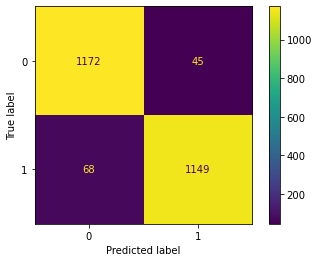

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
random_seed = 42

rf = RandomForestClassifier()
rf.fit(X_train_transformed, y_train_transformed)
print('Accuracy of RF classifier on training set: {:.2f}'.format(rf.score(X_train_transformed, y_train_transformed)))
print('Accuracy of RF classifier on test set: {:.2f}'.format(rf.score(X_test_transformed, y_test_transformed)))

pred = rf.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, rf.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

plt.show()

#### Model 2: SVC

Accuracy of SVM classifier on training set: 0.96
Accuracy of SVM classifier on test set: 0.95
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1217
           1       0.96      0.94      0.95      1217

    accuracy                           0.95      2434
   macro avg       0.95      0.95      0.95      2434
weighted avg       0.95      0.95      0.95      2434



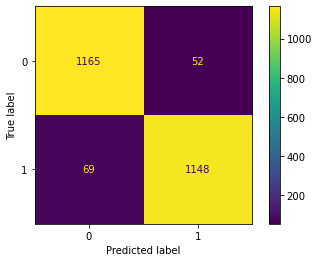

In [14]:
from sklearn.svm import SVC

#svc = SVC(gamma='auto',probability=True)
svc = SVC(probability=True)

svc.fit(X_train_transformed, y_train_transformed)

pred_svc = svc.predict(X_test_transformed)

print('Accuracy of SVM classifier on training set: {:.2f}'.format(svc.score(X_train_transformed, y_train_transformed)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svc.score(X_test_transformed, y_test_transformed)))

print(classification_report(y_test_transformed, pred_svc))

cm_svc = confusion_matrix(y_test_transformed, svc.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=svc.classes_)
disp.plot()

plt.show()


In [15]:
y_train_transformed

array([0, 0, 0, ..., 1, 1, 0])

#### Model 3: XGBoost

In [23]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


Accuracy of XGBoost classifier on training set: 1.00
Accuracy of XGBoost classifier on test set: 0.95
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1217
           1       0.96      0.94      0.95      1217

    accuracy                           0.95      2434
   macro avg       0.95      0.95      0.95      2434
weighted avg       0.95      0.95      0.95      2434



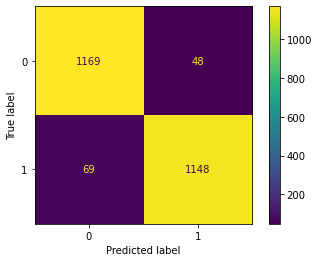

In [16]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# fit model no training data
xgb = XGBClassifier()
xgb.fit(X_train_transformed, y_train_transformed)

pred_xgb = xgb.predict(X_test_transformed)


print('Accuracy of XGBoost classifier on training set: {:.2f}'.format(xgb.score(X_train_transformed, y_train_transformed)))
print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(xgb.score(X_test_transformed, y_test_transformed)))

print(classification_report(y_test_transformed, pred_xgb))

cm_xgb = confusion_matrix(y_test_transformed, xgb.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=svc.classes_)
disp.plot()

plt.show()


#### Model4: Logistic Regression

In [17]:
from sklearn.preprocessing import MinMaxScaler  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  

# Imports required for model evaluation   
from sklearn.metrics import roc_auc_score  
from sklearn.metrics import roc_curve,auc  
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

scaler = MinMaxScaler()   
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  

# Prepare the model  
log_reg = LogisticRegression(solver="lbfgs")    
# Fit the model  
log_reg.fit(X_train, y_train.values.ravel())     
# Predict the target vectors  
y_pred_log_reg = log_reg.predict(X_test) 

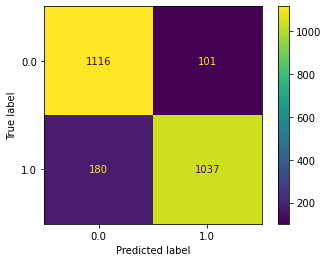

In [18]:
# Plot out a confusion matrix    
cm_xgb = confusion_matrix(y_test, y_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=log_reg.classes_)
disp.plot()
plt.show()

In [19]:
# Print the precision, recall and f1-scores  
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(log_reg .score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(log_reg .score(X_test, y_test)))

log_reg_accuracy = accuracy_score(y_pred_log_reg, y_test)  
print(f"Logistic regression accuracy: {round(log_reg_accuracy * 100)}%")  

#print(classification_report(y_test_transformed, pred_xgb))
print(classification_report(y_test, y_pred_log_reg))  

Accuracy of Logistic regression classifier on training set: 0.89
Accuracy of Logistic regression classifier on test set: 0.88
Logistic regression accuracy: 88%
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      1217
         1.0       0.91      0.85      0.88      1217

    accuracy                           0.88      2434
   macro avg       0.89      0.88      0.88      2434
weighted avg       0.89      0.88      0.88      2434



The ROC curve, along with the AUC score, confirms the previous assumptions. Even though the accuracy rate is a pretty good 83.8% and the ROC curve and AUC score support the success of this model, the difference in the recall rates and the F1 scores are worth investigating.

## Pipeline

In [28]:
# we need to build two separate pipes, one for handling numeric data and the other for categorical data
# Available strategies: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

num_pipeline = Pipeline(steps=[('scale_num', StandardScaler())])

In [29]:
# now we establish preprocessing pipe by columns
from sklearn.compose import ColumnTransformer
#num_cols = feature_selection
num_cols = features.select_dtypes(include="object").columns
#preproc = ColumnTransformer([('num_pipe', num_pipeline, feature_selection)],remainder='passthrough')
preproc = ColumnTransformer([('num_pipe', num_pipeline, features)],remainder='passthrough')

#### Random Forest Pipeline

In [30]:
# Generate the entire training pipeline with preprocessing and modeling
rf_pipe = Pipeline(steps=[('preproc', preproc),
                       ('rfmdl', RandomForestClassifier())])

# visualization of the pipeline
with config_context(display='diagram'):
    display(rf_pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('scale_num',
                                                                   StandardScaler())]),
                                                        L/W Ratio  T/W Ratio  Circularity  Angularity  Transparency
0         1.436      0.956        0.907      50.000         0.475
1         1.152      1.000        0.346      83.333         0.591
2         2.142      0.575        0.627      55.000         0.413
3         1.156      0.854        0.923      57.143         0.432
4         1.525      0.699        0.828      61.667         0.492
...         ...        ...          ...         ...           ...
4862      2.000      1.000        0.114     120.000         0.651
4863      2.500      1.000        0.214     110.000         0.601
4864      4.000      1.000        0.161      87.500         0.601
4865      4.000      1.000        0.161     116.667         0.653
4866      2.500      1.000        0.214     110.000         0.618

[9734 rows x 5 columns])])),
                ('rfmdl', RandomForestClassifier())])

#### SVM

In [31]:
# generate the entire training pipeline with preprocessing and modeling
# visualization of the pipeline

svc_pipe = Pipeline(steps=[('preproc', preproc),
                       ('svcmdl', SVC(gamma='auto'))])

with config_context(display='diagram'):
    display(svc_pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('scale_num',
                                                                   StandardScaler())]),
                                                        L/W Ratio  T/W Ratio  Circularity  Angularity  Transparency
0         1.436      0.956        0.907      50.000         0.475
1         1.152      1.000        0.346      83.333         0.591
2         2.142      0.575        0.627      55.000         0.413
3         1.156      0.854        0.923      57.143         0.432
4         1.525      0.699        0.828      61.667         0.492
...         ...        ...          ...         ...           ...
4862      2.000      1.000        0.114     120.000         0.651
4863      2.500      1.000        0.214     110.000         0.601
4864      4.000      1.000        0.161      87.500         0.601
4865      4.000      1.000        0.161     116.667         0.653
4866      2.500      1.000        0.214     110.000         0.618

[9734 rows x 5 columns])])),
                ('svcmdl', SVC(gamma='auto'))])

#### xgboost

In [32]:
xgb_pipe = Pipeline(steps=[('preproc', preproc),
                       ('xgbmdl', XGBClassifier())])

with config_context(display='diagram'):
    display(xgb_pipe)


Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('scale_num',
                                                                   StandardScaler())]),
                                                        L/W Ratio  T/W Ratio  Circularity  Angularity  Transparency
0         1.436      0.956        0.907      50.000         0.475
1         1.152      1.000        0.346      83.333         0.591
2         2.142      0.575        0.627      55.000         0.413
3         1.156      0.854        0.923      57.143         0.432
4         1.525      0.699        0.828      61.667         0.492
...         ...        ...          ...         ...           ...
4862...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

**Logistic Regression**

In [33]:
lr_pipe = Pipeline(steps=[('preproc', preproc),
                       ('lrmdl', LogisticRegression(solver="lbfgs") )])

with config_context(display='diagram'):
    display(lr_pipe)



Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('scale_num',
                                                                   StandardScaler())]),
                                                        L/W Ratio  T/W Ratio  Circularity  Angularity  Transparency
0         1.436      0.956        0.907      50.000         0.475
1         1.152      1.000        0.346      83.333         0.591
2         2.142      0.575        0.627      55.000         0.413
3         1.156      0.854        0.923      57.143         0.432
4         1.525      0.699        0.828      61.667         0.492
...         ...        ...          ...         ...           ...
4862      2.000      1.000        0.114     120.000         0.651
4863      2.500      1.000        0.214     110.000         0.601
4864      4.000      1.000        0.161      87.500         0.601
4865      4.000      1.000        0.161     116.667         0.653
4866      2.500      1.000        0.214     110.000         0.618

[9734 rows x 5 columns])])),
                ('lrmdl', LogisticRegression())])

## Cross-validation with hyperparameter tuning

In [34]:
# machine learning libs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn import config_context
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Random Forest

Accuracy of RF classifier on training set: 0.9751
Accuracy of RF classifier on test set: 0.9491
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1217
           1       0.96      0.94      0.95      1217

    accuracy                           0.95      2434
   macro avg       0.95      0.95      0.95      2434
weighted avg       0.95      0.95      0.95      2434



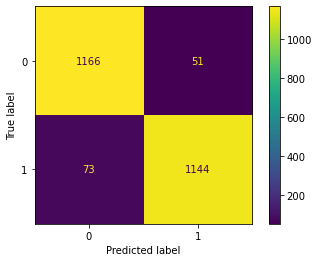

In [35]:
# these hyper parameters come from "04_Features_Evaluation.ipynb" from pipeline hyperparameter search/tuning 
rf_tuned = RandomForestClassifier(max_depth=8,n_estimators=200,max_features='log2',criterion='gini')
rf_tuned.fit(X_train_transformed, y_train_transformed)

print('Accuracy of RF classifier on training set: {:.4f}'.format(rf_tuned.score(X_train_transformed, y_train_transformed)))
print('Accuracy of RF classifier on test set: {:.4f}'.format(rf_tuned.score(X_test_transformed, y_test_transformed)))

pred_rf_tuned = rf_tuned.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred_rf_tuned))

cm = confusion_matrix(y_test_transformed, rf_tuned.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_tuned.classes_)
disp.plot()

plt.show()

### XGBoost

Accuracy of XGBoost classifier on training set: 0.98
Accuracy of XGBoost classifier on test set: 0.9540
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1217
           1       0.96      0.94      0.95      1217

    accuracy                           0.95      2434
   macro avg       0.95      0.95      0.95      2434
weighted avg       0.95      0.95      0.95      2434



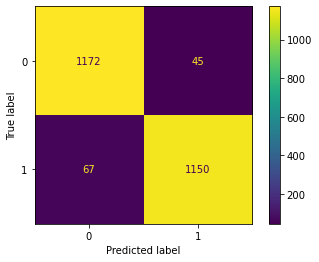

In [36]:
xg_tuned = XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.1, n_estimators = 100, subsample = 0.8)

xg_tuned.fit(X_train_transformed, y_train_transformed)

print('Accuracy of XGBoost classifier on training set: {:.2f}'.format(xg_tuned.score(X_train_transformed, y_train_transformed)))
print('Accuracy of XGBoost classifier on test set: {:.4f}'.format(xg_tuned.score(X_test_transformed, y_test_transformed)))

pred_xg_tuned = xg_tuned.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred_xg_tuned))

cm = confusion_matrix(y_test_transformed, xg_tuned.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xg_tuned.classes_)
disp.plot()

plt.show()

### SVC

Accuracy of SVC classifier on training set: 0.97
Accuracy of SVC classifier on test set: 0.9552
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1217
           1       0.96      0.94      0.95      1217

    accuracy                           0.96      2434
   macro avg       0.96      0.96      0.96      2434
weighted avg       0.96      0.96      0.96      2434



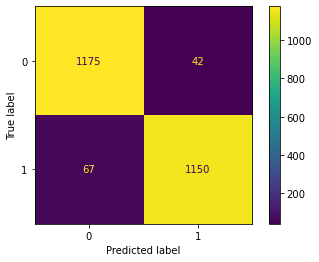

In [37]:
svc_tuned = SVC(C = 1, gamma = 1, kernel = 'rbf')

svc_tuned.fit(X_train_transformed, y_train_transformed)

print('Accuracy of SVC classifier on training set: {:.2f}'.format(svc_tuned.score(X_train_transformed, y_train_transformed)))
print('Accuracy of SVC classifier on test set: {:.4f}'.format(svc_tuned.score(X_test_transformed, y_test_transformed)))

pred_svc_tuned = svc_tuned.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred_svc_tuned))

cm = confusion_matrix(y_test_transformed, svc_tuned.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_tuned.classes_)
disp.plot()

plt.show()

### Logistic Regression

Accuracy of LR classifier on training set: 0.88
Accuracy of LR classifier on test set: 0.8817
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1217
           1       0.92      0.84      0.88      1217

    accuracy                           0.88      2434
   macro avg       0.88      0.88      0.88      2434
weighted avg       0.88      0.88      0.88      2434



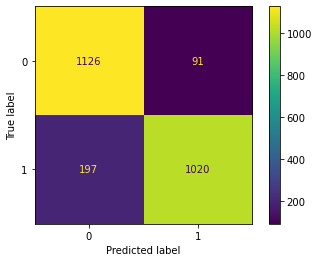

In [38]:
lr_tuned = LogisticRegression(C = 0.1, penalty = 'l2')

lr_tuned.fit(X_train_transformed, y_train_transformed)

print('Accuracy of LR classifier on training set: {:.2f}'.format(lr_tuned.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LR classifier on test set: {:.4f}'.format(lr_tuned.score(X_test_transformed, y_test_transformed)))

pred_lr_tuned = lr_tuned.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred_lr_tuned))

cm = confusion_matrix(y_test_transformed, lr_tuned.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_tuned.classes_)
disp.plot()

plt.show()

In [39]:
#for param in random_lr.get_params().keys():
#    print(param)

## Final fit

In [33]:
#random_rf.best_estimator_

In [34]:
#random_svc.best_estimator_

In [35]:
#random_xgb.best_estimator_

In [36]:
#random_lr.best_estimator_

## Performance metrics on test data (Model Evaluation)

**The resulting plot from that will show how the model really performs.**

random forest


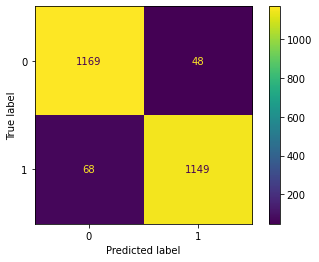

svm


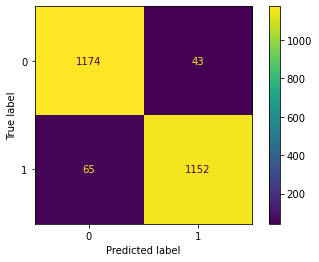

xgboost


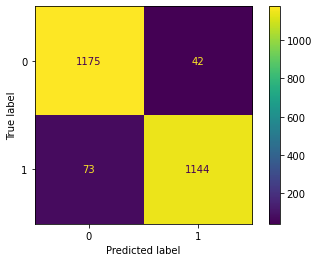

logistic regression


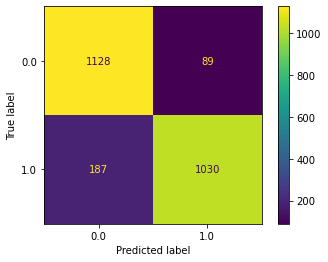

In [40]:
def metrics(predict,classes):
    cm = confusion_matrix(y_test_transformed, predict(X_test_transformed))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    
print("random forest")
plt.show(metrics(rf.predict,rf.classes_))
print("svm")
plt.show(metrics(svc.predict,svc.classes_))
print("xgboost")
plt.show(metrics(xgb.predict,xgb.classes_))
print("logistic regression")
cm_xgb = confusion_matrix(y_test, y_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=log_reg.classes_)
disp.plot()
plt.show()


When performing classification predictions, there's four types of outcomes that could occur.

(1) True positives are when you predict an observation belongs to a class and it actually does belong to that class.

(2) True negatives are when you predict an observation does not belong to a class and it actually does not belong to that class.

(3) False positives occur when you predict an observation belongs to a class when in reality it does not.

(4) False negatives occur when you predict an observation does not belong to a class when in fact it does.

**So from four plots below, we can find that XGBoost model has the most true positives which is 973. And logistic regression model has the most true negatives which is 25767.**

**Additionally, XGBoost and Random Forest seem to have very similar performance**

#### The three main metrics used to evaluate a classification model are accuracy, precision, and recall.

In [41]:
def accuracy(score,model_name,predict):
    print(model_name, 'classifier accuracy on training set: {:.4f}'.format(score(X_train_transformed, y_train_transformed)))
    print(model_name, 'classifier accuracy on testing set: {:.4f}'.format(score(X_test_transformed, y_test_transformed)))
    pred = predict(X_test_transformed)
    print(classification_report(y_test_transformed, pred))

accuracy(rf.score,"Random Forest",rf.predict)
accuracy(svc.score,"SVM",svc.predict)
accuracy(xgb.score,"XGBoost",xgb.predict)

# Print the precision, recall and f1-scores  
print('Logistic regression classifier accuracy on training set: {:.4f}'.format(log_reg .score(X_train, y_train)))
print('Logistic regression classifier accuracy on testing set: {:.4f}'.format(log_reg .score(X_test, y_test)))
log_reg_accuracy = accuracy_score(y_pred_log_reg, y_test)  
print(classification_report(y_test, y_pred_log_reg)) 

Random Forest classifier accuracy on training set: 1.0000
Random Forest classifier accuracy on testing set: 0.9523
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1217
           1       0.96      0.94      0.95      1217

    accuracy                           0.95      2434
   macro avg       0.95      0.95      0.95      2434
weighted avg       0.95      0.95      0.95      2434

SVM classifier accuracy on training set: 0.9600
SVM classifier accuracy on testing set: 0.9556
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1217
           1       0.96      0.95      0.96      1217

    accuracy                           0.96      2434
   macro avg       0.96      0.96      0.96      2434
weighted avg       0.96      0.96      0.96      2434

XGBoost classifier accuracy on training set: 0.9984
XGBoost classifier accuracy on testing set: 0.9528
              precision    recall

### (1) Accuracy

Accuracy is defined as the percentage of correct predictions for the test data. 

-- **Accuracy on training set: Random Forest(1.0) > XGBoost(0.99) > SVM(0.98) > Logistic regression(0.96)**


Random Forest has the highest accuracy on training set.

Logistic regression has the lowest accuracy on training set.


-- **Accuracy on testing set: Random Forest(0.98) = XGBoost(0.98) = SVM(0.98) > Logistic regression(0.96)**

Random Forest, XGBoost, SVM have almost the same accuracy on testing set.

Logistic regression has the lowest accuracy on testing set.

### (2) Precision 
Precision is defined as the fraction of relevant examples (true positives) 

**lithic data: XGBoost(0.93) > Random Forest(0.92) = SVM(0.92) = Logistic regression(0.92)**

**soil data: Random Forest(0.99) = SVM(0.99) > XGBoost(0.98) > Logistic regression(0.96)**

### (3) Recall
Recall is defined as the fraction of examples which were predicted to belong to a class with respect to all of the examples that truly belong in the class.

**lithic data: XGBoost(0.73) > Random Forest(0.72) > SVM(0.63) > Logistic regression(0.16)**

**soil data: Random Forest(1.0) = SVM(1.0) = XGBoost(1.0)  Logistic regression(1.0)**

### (4) ROC and AUC

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:(1) True Positive Rate  (2)False Positive Rate

AUC: Area Under the ROC Curve

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

In [46]:
# Plot ROC curve and calculate AUC score  
# The resulting ROC curve, along with the AUC score looks like this:  
def plot_roc_curve(X_test, y_test, model, model_name="Classifier"):  
    
    # The line below is equivalent to  
    y_predicted = model.predict(X_test)  
 
    # The line below is equivalent to  
    y_predicted_proba = model.predict_proba(X_test)  
    
    auc_roc_log_reg = roc_auc_score(y_test, y_predicted)
    
    # keep probabilities for the positive outcome only
    fpr,tpr,thresholds= roc_curve(y_test,y_predicted_proba[:,1]  )
   
    plt.plot(fpr, tpr, color="red", lw=2,   
              label=f"{model_name} (area = {auc_roc_log_reg:0.5f})")  
    plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="--",   
              label="Mean model (area = 0.500)")  
    plt.xlim([0.0, 1.0])  
    plt.ylim([0.0, 1.05])  
    plt.xlabel("False Positive Rate")  
    plt.ylabel("True Positive Rate")  
    plt.title("Receiver operating characteristic")  
    plt.legend(loc="lower right")  
    plt.show()  
   
    # Calculate the auc score  
    auc_score = auc(fpr, tpr)  
    print(f"auc_score: {round(auc_score, 3)}.")  

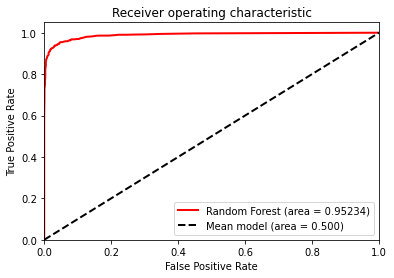

auc_score: 0.989.


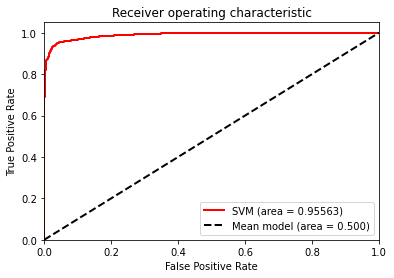

auc_score: 0.989.


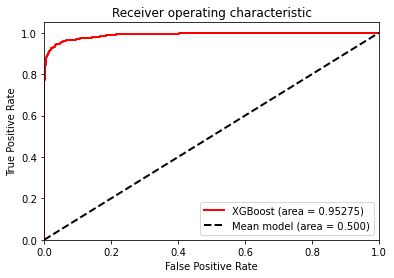

auc_score: 0.99.


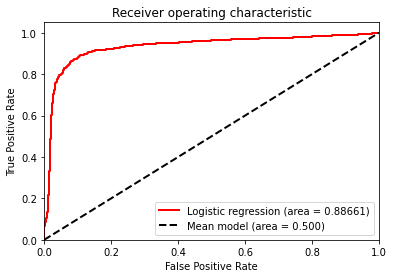

auc_score: 0.933.


In [47]:
plot_roc_curve(X_test_transformed, y_test_transformed, rf, "Random Forest") 
plot_roc_curve(X_test_transformed, y_test_transformed, svc, "SVM") 
plot_roc_curve(X_test_transformed, y_test_transformed, xgb, "XGBoost") 
plot_roc_curve(X_test, y_test, log_reg, "Logistic regression") 


**AUC :Logistic regression(0.838) > Random Forest(0.536) > XGBoost(0.509) > SVM(0.185)**

### (5) Bias & Variance

In [ ]:
!pip install mlxtend
from mlxtend.evaluate import bias_variance_decomp
from sklearn import metrics
import pandas as pd


In [ ]:
mse, bias, var = bias_variance_decomp(log_reg , X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=1)

#y_pred=xgb.predict(X_test.values.ravel())
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

## User Interface

In [20]:
import gradio as gr
#feature_selection = ['L/W Ratio', 'T/W Ratio', 'Circularity', 'Angularity', 'Transparency']


In [21]:
from sklearn.preprocessing import StandardScaler

#instantiate StandardScaler object
scaler = StandardScaler()

#scale data
x_train_scaled = scaler.fit_transform(X_train)

x_test_scaled = scaler.fit_transform(X_test)

In [24]:
def diabetes(a,b,c,d,e,model):
    x = np.array([a,b,c,d,e])
    
    if model=="RF":
        model = RandomForestClassifier()
        model.fit(x_train_scaled, y_train.values.ravel())
        prediction=model.predict(x.reshape(1, -1))      
        if prediction==1:
            return "Using RF model, this might be a lithic particle"
        else:
            return "Using RF model, this might be a soil particle"
        
    if model=="SVC":
        model = SVC()
        model.fit(x_train_scaled, y_train.values.ravel())
        prediction=model.predict(x.reshape(1, -1))      
        if prediction==1:
            return "Using svc model, this might be a lithic particle"
        else:
            return "Using svc model, this might be a soil particle"
        
    if model=="XGBoost":
        model = XGBClassifier()
        model.fit(x_train_scaled, y_train.values.ravel())
        prediction=model.predict(x.reshape(1, -1))      
        if prediction==1:
            return "Using XGBoost model, this might be a lithic particle"
        else:
            return "Using XGBoost model, this might be a soil particle"

In [25]:
#gr.Number(label = "L/W Ratio"),
            #gr.Number(label = "T/W Ratio"),
            #gr.Number(label = "Circularity"),
            #gr.Number(label = "Angularity"),
            #gr.Number(label = "Transparenc"),
            #'number','number','number','number','number'
            #gr.Radio(label = "Models", choices = ["RF", "SVC", "XGBoost"]),
outputs = gr.outputs.Textbox()
app = gr.Interface(
    fn=diabetes, 
    inputs=[
        gr.Number(label = "L/W Ratio"),
        gr.Number(label = "T/W Ratio"),
        gr.Number(label = "Circularity"),
        gr.Number(label = "Angularity"),
        gr.Number(label = "Transparency"),
        gr.Radio(label = "Models", choices = ["RF", "SVC", "XGBoost"]),
    ], 
    outputs=outputs,
    description="This is a  model")

app.launch(share=True)

/home/lix73/.local/lib/python3.9/site-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://1854bc7f-3694-455b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
